In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import os
import statistics
import cv2

In [2]:
main_path_new = '../data/Task04_Hippocampus_processed/'

[0. 1. 2.]


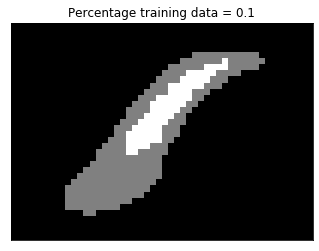

[0. 1. 2.]


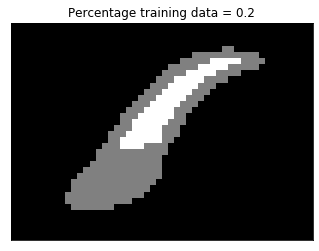

[0. 1. 2.]


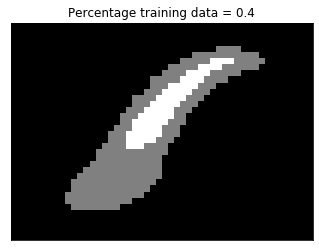

[0. 1. 2.]


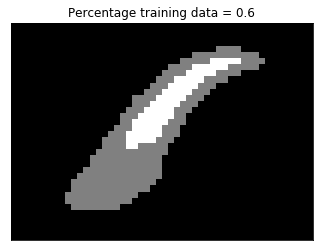

[0. 1. 2.]


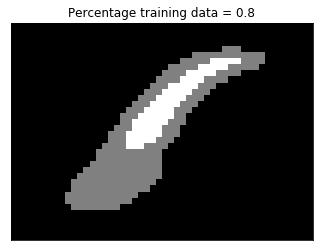

[0. 1. 2.]


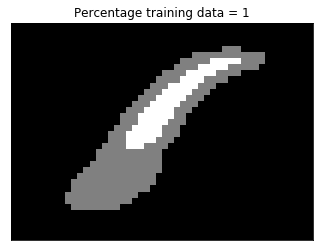

In [3]:
seg_files_new = sorted(os.listdir(main_path_new+'labelsTr'))
for j in [0.1, 0.2, 0.4, 0.6, 0.8, 1]:
    
    count = 0
    for i in seg_files_new[:int(j*len(seg_files_new))]:
        seg = np.load(main_path_new+'labelsTr/'+i)
    #     print(img.shape, seg.shape)
        if count == 0:
            mean = np.mean(seg, axis = 2)
        else:
            mean+=np.mean(seg, axis=2)
        count+=1
    #     mean /= np.max(mean)
    #     mean *= 2
    #     mean = mean.astype(int)
    #     print(np.min(mean), np.max(mean))
    #     for j in range(seg.shape[2]):
    mean=mean/(count+1)
    mean /= np.max(mean)
    mean *= 2
    mean[np.where((mean>0) & (mean<0.5))] = 0
    mean[np.where((mean>=0.5) & (mean<1.5))] = 1
    mean[np.where((mean>=1.5) & (mean<=2))] = 2
    print(np.unique(mean))
    fig = plt.figure()
    plt.imshow(mean, cmap='gray')
    plt.title('Percentage training data = '+str(j))
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
    np.save(file = 'priors/'+str(j)+'.npy', arr = mean)
    fig.savefig('priors/thresh'+str(j)+'.jpg')

In [5]:
img_files = sorted(os.listdir(main_path_new+'imagesTr'))
seg_files = sorted(os.listdir(main_path_new+'labelsTr'))

In [13]:
img = np.load(main_path_new+'imagesTr/'+img_files[0])
seg = np.load(main_path_new+'labelsTr/'+seg_files[0])

In [7]:
seg.shape, img.shape

((36, 50, 35), (36, 50, 35))

In [8]:
from sklearn.cluster import KMeans

In [10]:
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit(img[:,:,20].reshape(-1,1)).labels_
X_centres = kmeans.cluster_centers_
output = labels.reshape(36,-1)

In [14]:
X_clustered_new = np.zeros(output.shape)
old_labels = [0, 1, 2]
new_label = []
X_centres_new = np.sort(X_centres, axis = None)
#print(X_centres_new)

for i in range(3):
    position = np.where(X_centres_new == X_centres[i][0])
    new_label.append(position[0])
new_label = np.asarray(new_label)
#print(new_label)

for i in range(3):
    pos = np.where(output==old_labels[i])
    X_clustered_new[pos]=new_label[i][0]
#print(X_clustered_new)

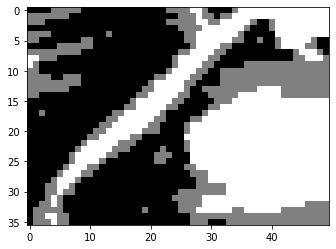

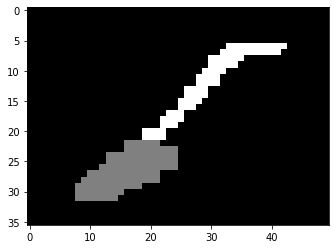

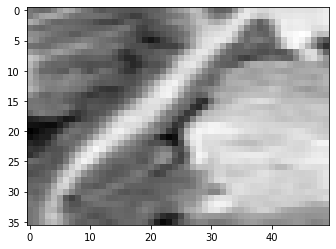

In [17]:

plt.imshow(X_clustered_new, cmap='gray')
plt.show()
plt.imshow(seg[:,:,20], cmap='gray')
plt.show()
plt.imshow(img[:,:,20], cmap='gray')
plt.show()

In [19]:
import copy

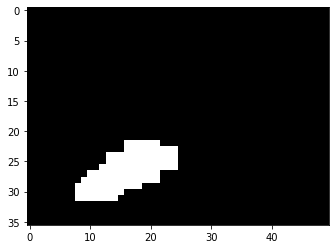

In [21]:
# Rough shape prior
img = np.load(main_path_new+'imagesTr/'+img_files[0])
seg = np.load(main_path_new+'labelsTr/'+seg_files[0])
seg_slice_left = copy.deepcopy(seg[:,:,20])
seg_slice_right = copy.deepcopy(seg[:,:,20])
seg_slice_left[seg[:,:,20]==2] = 0
seg_slice_right[seg[:,:,20]==1] = 0
plt.imshow(seg_slice_left, cmap='gray')
plt.show()

In [33]:
left_indices = np.where(seg_slice_left==1)
print(left_indices)
centre_index = np.average(left_indices, axis=1).astype(int)
print(centre_index) 
sum_indices = np.sum(left_indices, axis=0)
print(sum_indices)
least_x = np.where(sum_indices==np.min(sum_indices))
print(least_x)
least_x_coord = left_indices[least_x]
print(least_x_coord)

(array([22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25,
       25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,
       26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29,
       29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31,
       31]), array([16, 17, 18, 19, 20, 21, 16, 17, 18, 19, 20, 21, 22, 23, 24, 13, 14,
       15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,  9, 10, 11, 12,
       13, 14, 15, 16, 17, 18, 19, 20, 21,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18,  8,  9, 10, 11, 12, 13, 14, 15,  8,  9, 10, 11, 12, 13,
       14]))
[26 16]
[38 39 40 41 42 43 39 40 41 42 43 44 45 46 47 37 38 39 40 41 42 4

TypeError: tuple indices must be integers or slices, not tuple